# Experiment board simulation

---
## Objectives
- Simulate behaviour of circuit to design it.
- Verify that the designed circuit perform as expected.
---

## Simulation flow chart


In [1]:
##################### Importations #####################
# Project librairies
import simulation_fct as f
# Standards librairies
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import *

In [2]:
######################## PATHS ########################
path_stimuli = "Simulation_signals/Stimuli/"   # Export stimuli from python here
path_output = "Simulation_signals/Outputs/"    # Import simulation results from here

(199999, 2)


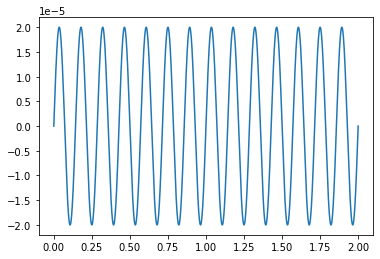

In [3]:
#################### Pure sine wave ###################
signal_name = "sine_7_20u"                        # Signal name for txt output
signal_mult = f.sine_generator(7,20E-6,2,10E-6)
plt.plot(signal_mult[:,0], signal_mult[:,1])
print(np.shape(signal_mult))
np.savetxt(path_stimuli+signal_name+".txt", signal_mult ) # Save sine wave to txt file


(199999, 2)


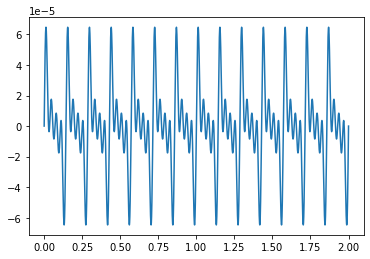

In [4]:
################### Sum of sines wave ##################
signal_name = "sum_sine_1"                            # Signal name for txt output
sines_freq = [7,14,21,28]                             # Sines frequencies
sines_amp  = [20E-6,20E-6,20E-6,20E-6]                # Sines amplitudes
signal1 = f.multi_sine_generator(sines_freq,sines_amp,2,10E-6) 
plt.plot(signal1[:,0], signal1[:,1])
print(np.shape(signal1))
#np.savetxt(path_stimuli+signal_name+".txt", signal1 ) # Save sine wave to txt file

99999


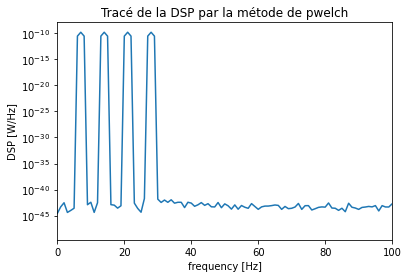

In [5]:
fs = 1/10E-6
df = 1 # résolution en fréquence réelle
# Calcul des paramètre de pwelch
nfft = int((fs / df)) # longeur dft
print(nfft)
len_wind = nfft # taille fenetre
overlap = 50
# % d'overlap entre les fenetres
fenetre = get_window('hamming', len_wind)
# Calcul de la DSP avec pwelch
f_welch, Pxx_den = welch(signal1[:,1], fs=fs, window=fenetre, noverlap=overlap, nfft=nfft)
# Tracé de la DSP
plt.semilogy(f_welch, Pxx_den)
plt.title("Tracé de la DSP par la métode de pwelch")
plt.xlabel('frequency [Hz]')
plt.ylabel('DSP [W/Hz]')
plt.xlim([0,100])
plt.show()

## Ressources